In [1]:
import cv2
import numpy as np
import torch
from scipy.stats import entropy
from PIL import Image
import os
import io
from skimage.filters import sobel
from scipy.ndimage import uniform_filter


# # ---------------- 1. Shannon Entropy ----------------
# def compute_complexity(image):
#     """Compute Shannon entropy of an image."""
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
#     hist /= hist.sum()  # Normalize histogram to get probability distribution
#     return entropy(hist.flatten())

# # ---------------- 2. JPEG Compression Ratio ----------------
def compute_complexity(image):
    """Approximate complexity by computing JPEG compression ratio."""
    _, encoded = cv2.imencode(".jpg", image, [cv2.IMWRITE_JPEG_QUALITY, 50])
    return len(encoded) / (image.shape[0] * image.shape[1])

# # # # ---------------- 3. Edge Density ----------------
# def compute_complexity(image):
#     """Compute edge density using Sobel filter."""
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     edges = sobel(gray)
#     return np.mean(edges)

# def compute_complexity(image, window_size=5):
#     """Compute edge density using Sobel filter and sliding window variance."""
#     # Convert image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Compute edges using Sobel filter
#     edges = sobel(gray)
    
#     # Compute sliding window mean
#     mean_edge_map = uniform_filter(edges, size=window_size, mode='reflect')
    
#     # Compute variance of the mean edge map
#     variance = np.var(mean_edge_map)
    
#     return variance

# def compute_complexity(image):
#     """Compute edge density using Canny edge detection."""
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     edges = cv2.Canny(gray, 100, 200)  # Adjust thresholds as needed
#     return np.mean(edges)


def show_image(image):
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_paths = [
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/generated_images/cumulative_shapes_1.png",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/generated_images/cumulative_shapes_10.png",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/generated_images/cumulative_shapes_20.png",
]

# image_paths = [
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/dalle_images/level0.png",
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/dalle_images/level1.png",
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/dalle_images/level3.png",
# ]

import matplotlib.pyplot as plt

def show_image_matplotlib(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

for img in image_paths:
    image = cv2.imread(img)
    if image is None:
        print(f"Error loading image: {img}")
        continue

    e = compute_complexity(image)
    print(f"img: {img}")
    print(f"Complexity: {e}")
    print()

    # show_image_matplotlib(image)

img: /shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/generated_images/cumulative_shapes_1.png
Complexity: 0.02794599253088193

img: /shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/generated_images/cumulative_shapes_10.png
Complexity: 0.05420281528296467

img: /shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/qualitative_example_generator/generated_images/cumulative_shapes_20.png
Complexity: 0.08186153404194198



Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/34109.jpg, Complexity: 0.07106171150630795


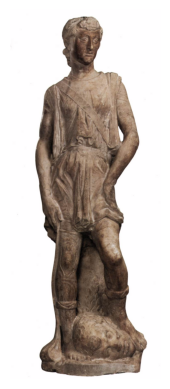

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/416.jpg, Complexity: 0.07940326760786723


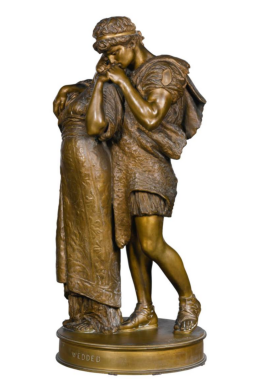

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/22842.jpg, Complexity: 0.12179707438530968


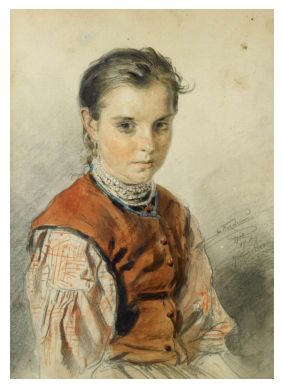

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/19417.jpg, Complexity: 0.12202937853107344


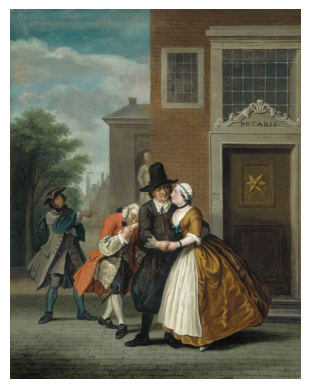

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/42152.jpg, Complexity: 0.13510282161645146


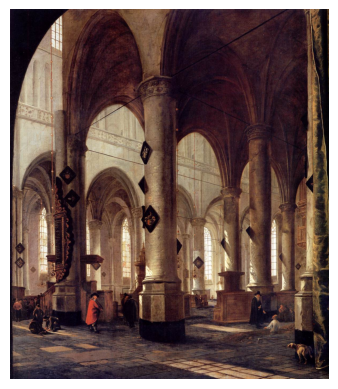

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/18926.jpg, Complexity: 0.13816412490922295


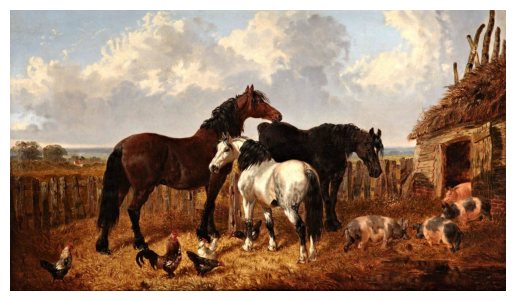

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/701.jpg, Complexity: 0.15015444015444016


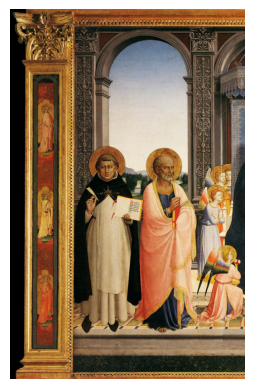

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/42941.jpg, Complexity: 0.15027118475394338


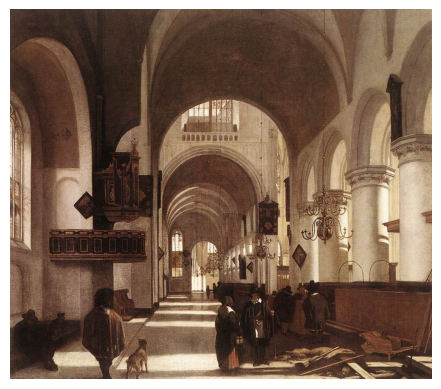

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/38740.jpg, Complexity: 0.15607308970099668


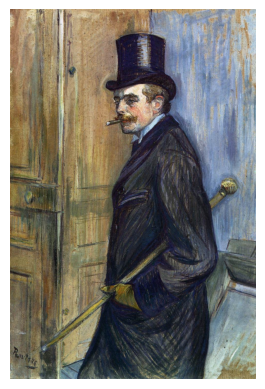

Image: /shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/11726.jpg, Complexity: 0.2500590318772137


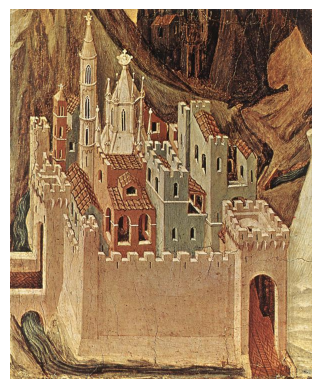

In [2]:
from glob import glob

# image_paths = glob("/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/llava-bench-in-the-wild/images/*")
image_paths = glob("/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version/artwork/images/*")
image_paths = image_paths[:10]

image_complexity = []

# Compute complexity for each image
for img_path in image_paths:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error loading image: {img_path}")
        continue
    # resize image to the same size
    # image = cv2.resize(image, (256, 256))
    complexity = compute_complexity(image)
    image_complexity.append((img_path, complexity, image))

# Sort images by complexity (ascending order)
image_complexity.sort(key=lambda x: x[1])

# Display images in sorted order
for img_path, complexity, image in image_complexity:
    print(f"Image: {img_path}, Complexity: {complexity}")
    show_image_matplotlib(image)

In [3]:
from tqdm import tqdm
# store complexity for all MME images
image_root = "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/MME_Benchmark_release_version"
subdirs = glob(f"{image_root}/*")
all_image_paths = [] # (key, id)
for subdir in subdirs:
    cat_name = subdir.split("/")[-1]
    if "images" in os.listdir(subdir):
        image_paths_jpg = glob(f"{subdir}/images/*.jpg")
        image_paths_png = glob(f"{subdir}/images/*.png")
        image_paths = image_paths_jpg + image_paths_png
    else:
        image_paths_jpg = glob(f"{subdir}/*.jpg")
        image_paths_png = glob(f"{subdir}/*.png")
        image_paths = image_paths_jpg + image_paths_png

    for img_path in image_paths:
        img_name = img_path.split("/")[-1].split(".")[0]
        img_id = f"{cat_name}/{img_name}"
        all_image_paths.append((img_id, img_path))

print(f"Total number of images: {len(all_image_paths)}")
id_to_complexity = {}
for img_id, img_path in tqdm(all_image_paths):
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error loading image: {img_path}")
        continue
    complexity = compute_complexity(image)
    id_to_complexity[img_id] = complexity

# # same in json format
# import json
# with open(f"{image_root}/image_complexity_jpeg_enc.json", "w") as f:
#     json.dump(id_to_complexity, f)

Total number of images: 1187


  0%|          | 0/1187 [00:00<?, ?it/s]

100%|██████████| 1187/1187 [00:14<00:00, 79.85it/s] 


Total number of outputs: 2374
Total number of outputs: 2374
Total number of outputs: 2374
Total number of outputs: 2374
Total number of outputs: 2374
Total number of outputs: 2374


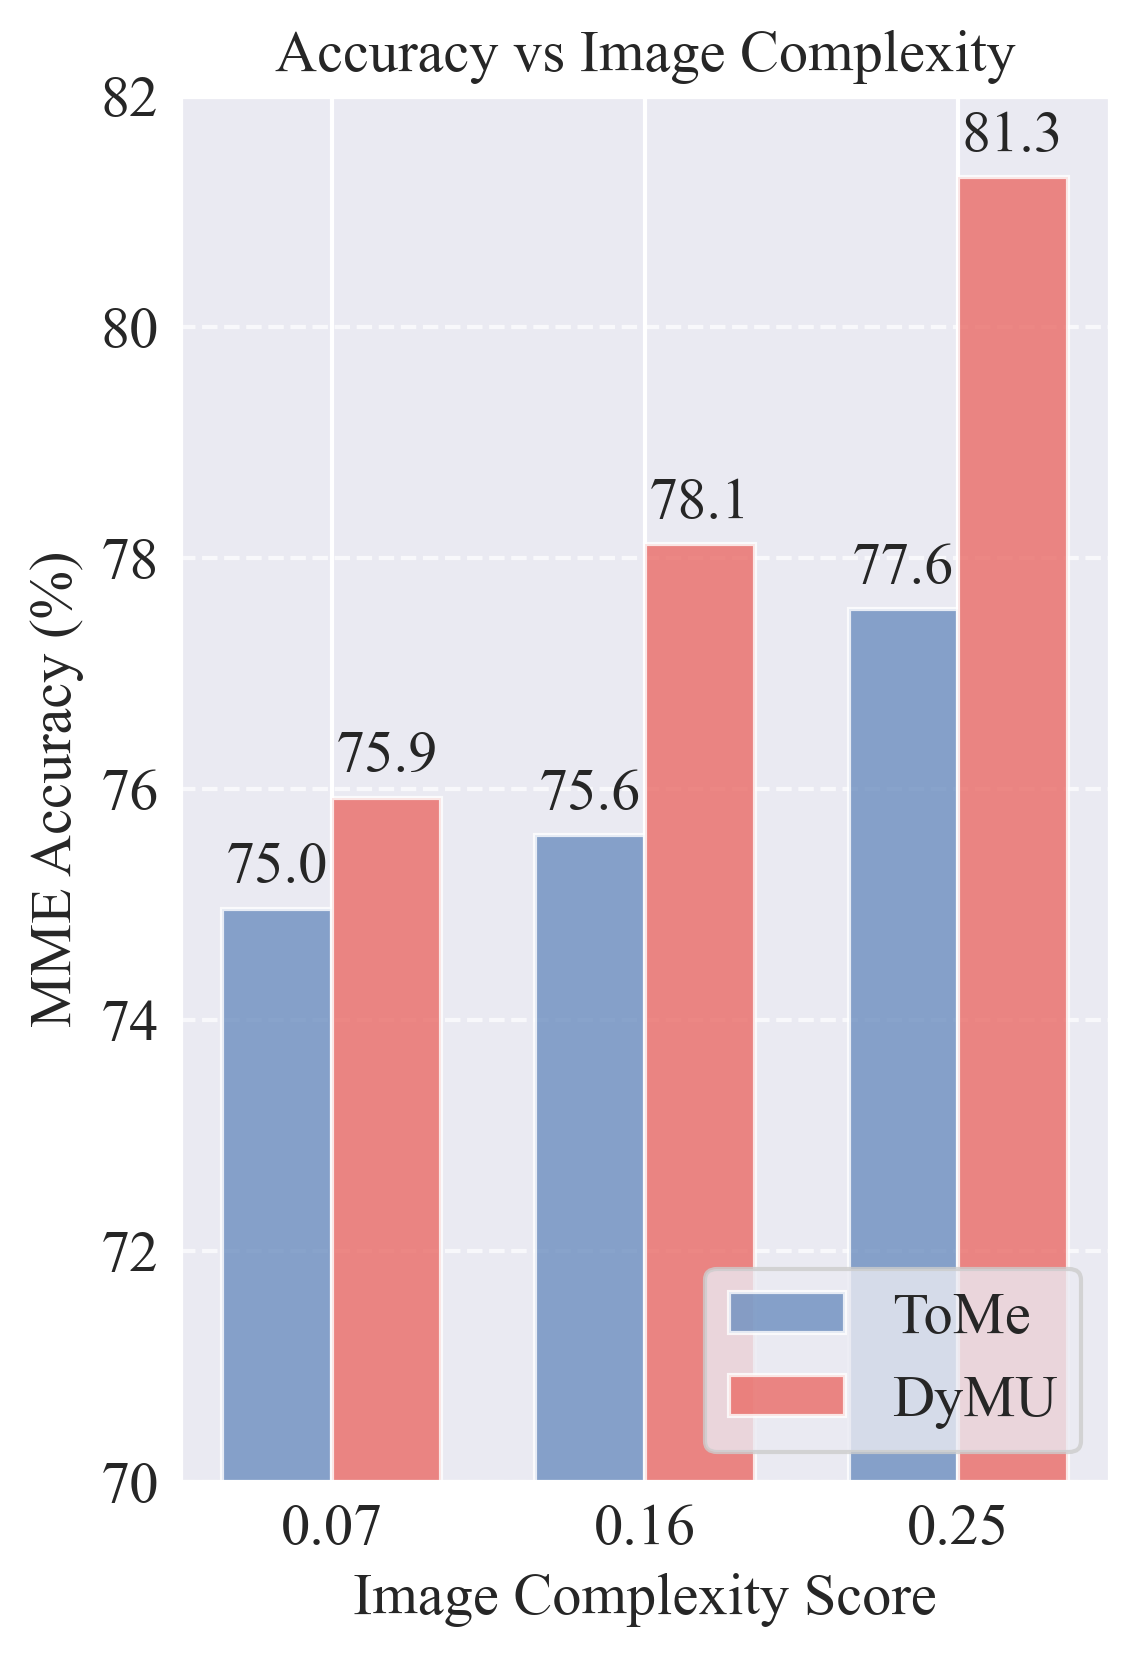

In [4]:
def divide_chunks(l, n=2):
    # looping till length l
    for i in range(0, len(l), n): 
        yield l[i:i + n]
    
    return 

def parse_pred_ans(pred_ans):
    pred_label = None
    if pred_ans in ["yes", "no"]:
        pred_label = pred_ans
    else:
        prefix_pred_ans = pred_ans[:4]

        if "yes" in prefix_pred_ans:
            pred_label = "yes"
        elif "no" in prefix_pred_ans:
            pred_label = "no"
        else:
            pred_label = "other"

    return pred_label

def process_one_txt_file(task_txt, id_to_complexity_dict):
    lines = open(task_txt, 'r').readlines()
    task_name = task_txt.split("/")[-1].split(".")[0]
    chunk_lines = list(divide_chunks(lines)) # one image corresponds to two questions
    
    gts = []
    preds = []

    outputs = [] # (complexity, correct_or_not)
    for img_items in chunk_lines:
        assert len(img_items) == 2

        for img_item in img_items:
            img_name, question, gt_ans, pred_ans = img_item.split("\t")

            gt_ans = gt_ans.lower()
            pred_ans = pred_ans.lower()

            assert gt_ans in ["yes", "no"] # gt can only be yes or no.

            pred_ans = parse_pred_ans(pred_ans)
            assert pred_ans in ["yes", "no", "other"]

            gts.append(gt_ans)
            preds.append(pred_ans)
            
            img_name = img_name.split(".")[0]
            img_id = f"{task_name}/{img_name}"
            complexity = id_to_complexity_dict[img_id]

            if gt_ans == pred_ans:
                outputs.append((complexity, 1))
            else:
                outputs.append((complexity, 0))
    
    return outputs


import seaborn as sns
import matplotlib.pyplot as plt
def plot_kde_distribution_single_task(performances, complexity, output_dir="."):
    complexity_np = np.array(complexity)
    performances_np = np.array(performances)

    incorrect_complexity = complexity_np[performances_np == 0]
    correct_complexity = complexity_np[performances_np == 1]
    
    color_map = plt.get_cmap('tab10') 
    color_incorrect = color_map(3)
    color_correct = color_map(0)
    marker_size = 100

    # Plotting
    plt.figure(figsize=(7, 6), dpi=300)
    
    # Scatter plot for performance = 0
    plt.scatter(incorrect_complexity, np.zeros(len(incorrect_complexity)) + 0.5, color=color_incorrect, alpha=0.2, s = marker_size)
    
    # Scatter plot for performance = 1
    plt.scatter(correct_complexity, np.zeros(len(correct_complexity)) + 0.5, color=color_correct, alpha=0.2, s = marker_size)
  

    # Plot KDE for performance = 0
    sns.kdeplot(incorrect_complexity, color=color_incorrect, label='Incorrect')
    
    # Plot KDE for performance = 1
    sns.kdeplot(correct_complexity, color=color_correct, label='Correct')

     # Calculate medians
    median_perf_0 = np.median(incorrect_complexity)
    median_perf_1 = np.median(correct_complexity)

    # Visualize the x-axis where the density area is half of the entire distribution
    plt.axvline(median_perf_0, color=color_incorrect, alpha=0.5, linestyle='--', label='Median (Incorrect)')
    plt.axvline(median_perf_1, color=color_correct, alpha=0.5, linestyle='--', label='Median (Correct)')

    plt.title(f'Instance Correctness KDE w.r.t Image Complexity', fontsize=22)
    plt.xlabel(f'Complexity', fontsize=22)
    plt.ylabel('Density', fontsize=22)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.tight_layout()
    # plt.savefig(os.path.join(output_dir, f'instance_level_perception_vs_performance__{task_name}__{sim_score_type}.pdf'), format='pdf')
    plt.show()


def plot_bin_bars(model_data):
    # Set font and theme
    plt.rcParams["font.family"] = "Times New Roman"
    sns.set_theme()
    
    # Define number of bins
    num_bins = 3
    
    # Determine global bin edges based on all models
    all_complexity = np.concatenate([data[0] for data in model_data.values()])
    bins = np.linspace(min(all_complexity), max(all_complexity), num_bins + 1)
    bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(num_bins)]
    
    # # Set color palette
    # colors = sns.color_palette("husl", len(model_data))

    opacity = 0.8
    
    plt.figure(figsize=(4, 6), dpi=300)
    width = (bins[1] - bins[0]) * 0.7 / len(model_data)  # Adjust bar width to prevent overlap
    
    # ylim = (0.7, 0.82)
    ylim = (70, 82)
    for idx, (model_name, (complexity, performance)) in enumerate(model_data.items()):
        bin_indices = np.digitize(complexity, bins) - 1
        accuracies = [np.mean(np.array(performance)[bin_indices == i]) if np.sum(bin_indices == i) > 0 else 0 for i in range(num_bins)]
        accuracies = [acc*100 for acc in accuracies]  # Convert to percentage
        # Offset bars slightly for better visibility
        x_positions = np.array(bin_centers) + (idx - (len(model_data) - 1) / 2) * width
        bars = plt.bar(
            x_positions,
            accuracies,
            width=width,
            color=colors[model_name],
            alpha=opacity,
            label=model_name,
            edgecolor=None,
            align='center'
        )
        
        # Add numerical annotation on top of bars
        for bar, acc in zip(bars, accuracies):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.01 * (ylim[1] - ylim[0]),  # Offset above the bar
                f"{acc:.1f}",
                ha='center',
                va='bottom',
                fontsize=14,
                # fontweight='bold'
                fontname="Times New Roman"
            )
    
    # Labels and formatting
    plt.xlabel("Image Complexity Score", fontsize=14, fontname="Times New Roman")
    plt.ylabel("MME Accuracy (%)", fontsize=14, fontname="Times New Roman")
    plt.title("Accuracy vs Image Complexity", fontsize=14, fontname="Times New Roman")
    plt.xticks(bin_centers, [f"{center:.2f}" for center in bin_centers], fontsize=14, ha='center', fontname="Times New Roman")
    plt.yticks(fontsize=14, fontname="Times New Roman")
    # plt.ylim(0.0, 1.0)
    plt.ylim(*ylim)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    ax = plt.gca()  # Get the current axis
    ax.yaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer
    ax.xaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer

    legend = plt.legend(loc='lower right', fontsize=14)
    for text in legend.get_texts():
        text.set_fontname("Times New Roman")
    # Show plot
    plt.show()

colors = {
    "ToMe": "#6C8EBF",
    # "DyMU": "#67AB9F",
    # "DyMU": "#B5739D",
    "DyMU": "#EA6B66"
}

# laod answer files
output_data = {}
for model_name, answer_txt_dir in [
    ("ToMe", "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/instance_level-72out__pretrained_openai__schedule-constant_1"),
    ("ToMe", "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/instance_level-72out__pretrained_openai__schedule-constant_2"),
    ("ToMe", "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/instance_level-72out__pretrained_openai__schedule-constant_3"),
    # ("instance_level_repeat", "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_1"),
    # ("instance_level_repeat", "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_2"),
    # ("instance_level_repeat", "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_3"),
    ("DyMU","/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_1"),
    ("DyMU","/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_2"),
    ("DyMU","/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/eval_tool/answers/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_3"),
]:
    answer_files = glob(f"{answer_txt_dir}/*")

    all_outputs = []
    for answer_file in answer_files:
        all_outputs.extend(process_one_txt_file(answer_file, id_to_complexity))

    print(f"Total number of outputs: {len(all_outputs)}")

    complexity = [x[0] for x in all_outputs] # float
    performance = [x[1] for x in all_outputs] # 1: correct, 0: incorrect
    # plot_kde_distribution_single_task(performance, complexity)
    if model_name not in output_data:
        output_data[model_name] = [complexity, performance]
    else:
        output_data[model_name][0].extend(complexity)
        output_data[model_name][1].extend(performance)
plot_bin_bars(output_data)

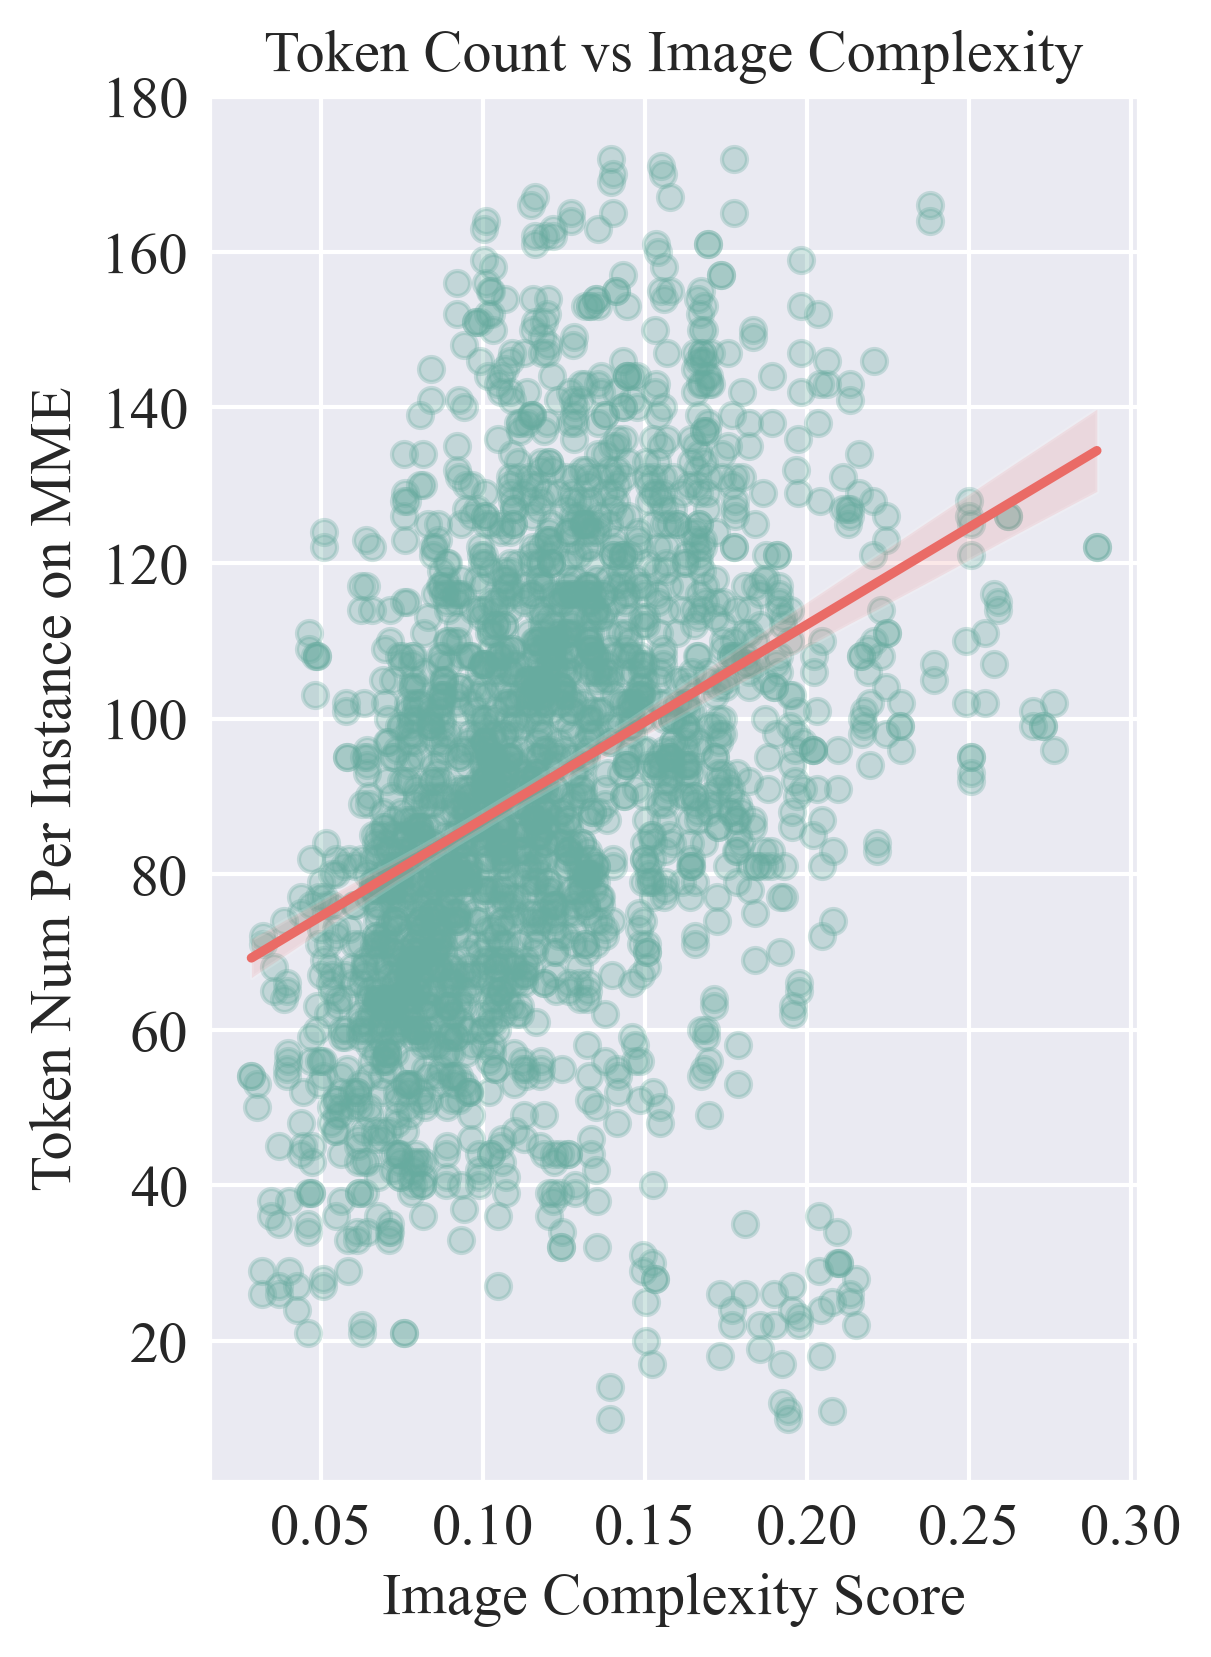

In [8]:

import json
layer_idx = 22

def ntok_per_instance_vs_complexity_mme(output_name, id_to_complexity, answer_root = "/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval/MME/answers"):
    jsonl_file = os.path.join(answer_root, f"{output_name}.jsonl")
    with open(jsonl_file, "r") as f:
        answers = [json.loads(line) for line in f]
    ntoks_all_instance = [] # (complexity, ntoks)
    for ans in answers:
        if ans["metadata"]["ntok_instance"] is None:
            continue
        ntok = ans["metadata"]["ntok_instance"][f"block_{layer_idx}_ntoks"]
        qid = ans["question_id"]
        cat = qid.split("/")[0]
        name = qid.split("/")[-1].split(".")[0]
        img_id = f"{cat}/{name}"
        complexity = id_to_complexity[img_id]
        ntoks_all_instance.append((complexity, ntok))
    return ntoks_all_instance

output_data = {}
for model_name, output_name in [
    ("DyMU","rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_1"),
    ("DyMU","rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_2"),
    ("DyMU","rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat_3"),
]:
    ntoks_all_instance = ntok_per_instance_vs_complexity_mme(output_name, id_to_complexity)
    complexity = [x[0] for x in ntoks_all_instance]
    ntoks = [x[1] for x in ntoks_all_instance]
    if model_name not in output_data:
        output_data[model_name] = [complexity, ntoks]
    else:
        output_data[model_name][0].extend(complexity)
        output_data[model_name][1].extend(ntoks)


# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set theme and font
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set_theme()

# scatter_color = "#67AB9F"
# scatter_alpha = 0.3
# scatter_reg_line_color = "#EA6B66"

# # Sample data (replace with your actual data)
# complexity = [x[0] for x in ntoks_all_instance]
# ntoks = [x[1] for x in ntoks_all_instance]

# # Create scatter plot with regression line
# plt.figure(figsize=(4, 6), dpi=300)
# sns.regplot(x=complexity, y=ntoks, scatter=True, line_kws={"color": scatter_reg_line_color}, 
#             scatter_kws={"alpha": scatter_alpha, "color": scatter_color})

# # Labels and title
# plt.xlabel("Image Complexity Score", fontsize=14, fontname="Times New Roman")
# plt.ylabel("Token Num Per Instance on MME", fontsize=14, fontname="Times New Roman")
# plt.title("Token Count vs Image Complexity", fontsize=14, fontname="Times New Roman")
# plt.xticks(fontsize=14, fontname="Times New Roman")
# plt.yticks(fontsize=14, fontname="Times New Roman")

# ax = plt.gca()  # Get the current axis
# ax.yaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer
# ax.xaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer

# # Show plot
# plt.show()

# Set theme and font
plt.rcParams["font.family"] = "Times New Roman"
sns.set_theme()

scatter_color = "#67AB9F"
scatter_alpha = 0.3
scatter_reg_line_color = "#EA6B66"

# Sample data (replace with your actual data)
complexity = np.array([x[0] for x in ntoks_all_instance])
ntoks = np.array([x[1] for x in ntoks_all_instance])

# Function to remove outliers using IQR
def remove_outliers(x, y):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]

# Filter data
filtered_complexity, filtered_ntoks = remove_outliers(complexity, ntoks)

# Create scatter plot with regression line
plt.figure(figsize=(4, 6), dpi=300)
sns.regplot(
    x=filtered_complexity, y=filtered_ntoks, scatter=True,
    line_kws={"color": scatter_reg_line_color}, 
    scatter_kws={"alpha": scatter_alpha, "color": scatter_color}
)

# Labels and title
plt.xlabel("Image Complexity Score", fontsize=14, fontname="Times New Roman")
plt.ylabel("Token Num Per Instance on MME", fontsize=14, fontname="Times New Roman")
plt.title("Token Count vs Image Complexity", fontsize=14, fontname="Times New Roman")
plt.xticks(fontsize=14, fontname="Times New Roman")
plt.yticks(fontsize=14, fontname="Times New Roman")

ax = plt.gca()  # Get the current axis
ax.yaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer
ax.xaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer

# Show plot
plt.show()